In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import expm
from scipy import stats
import random
import quspin
import os
import time
from math import comb


In [2]:
np.set_printoptions(suppress=True,precision=3)
from quspin.basis import spin_basis_1d
from quspin.operators import hamiltonian

In [3]:
def XXZHamiltonian(L,M,J_zz,J_ch): #returns hamiltonian in the standard basis
    basis = spin_basis_1d(L=L,Nup = M)
    op_list_xy = [[1/4,i,i+1]for i in range(0,L-1)]#integrable terms of the Hamiltonian
    op_list_zz = [[J_zz/4,i,i+1]for i in range(0,L-1)]

    if J_ch == 0:
        static = [["xx",op_list_xy],["yy",op_list_xy],["zz",op_list_zz]]

        H_XXZ = hamiltonian(static,[],basis = basis)
        return H_XXZ
    else:
        op_list_xy_NNN = [[J_ch/4,i,i+2]for i in range(0,L-2)]

        static = [["xx",op_list_xy],["yy",op_list_xy],["zz",op_list_zz],["xx",op_list_xy_NNN],["yy",op_list_xy_NNN]]

        H_XXZ_NNN = hamiltonian(static,[],basis = basis)
        return H_XXZ_NNN

In [4]:
l=16
m=9

#will include the inbetween case later
H_in = XXZHamiltonian(l,m,0.5,0)
H_ch = XXZHamiltonian(l,m,0.5,1.0)

Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!
Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!


In [5]:
time1=time.time()

int_eval,int_evect = H_in.eigh(0)
ch_eval,ch_evect = H_ch.eigh(0)

time2=(time.time()-time1)

In [6]:
#Calculates the shanon entropy for eigenstates without time evolution
time3=time.time()

int_shanons=[]
ch_shanons=[]

for int_psi,ch_psi in zip(int_evect,ch_evect):
    int_s=-1*np.sum( (int_psi*np.conjugate(int_psi)) * np.log(int_psi*np.conjugate(int_psi)) )
    ch_s=-1*np.sum( (ch_psi*np.conjugate(ch_psi)) * np.log(ch_psi*np.conjugate(ch_psi)) )

    int_shanons.append(int_s)
    ch_shanons.append(ch_s)

totaltime=(time.time()-time3)+time2
print(totaltime)

C:\Users\strik\AppData\Local\Temp\ipykernel_34460\4143995823.py:8: RuntimeWarning: divide by zero encountered in log
  int_s=-1*np.sum( (int_psi*np.conjugate(int_psi)) * np.log(int_psi*np.conjugate(int_psi)) )
C:\Users\strik\AppData\Local\Temp\ipykernel_34460\4143995823.py:8: RuntimeWarning: invalid value encountered in multiply
  int_s=-1*np.sum( (int_psi*np.conjugate(int_psi)) * np.log(int_psi*np.conjugate(int_psi)) )


874.567813873291


c:\Users\strik\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\strik\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\cbook.py:1355: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


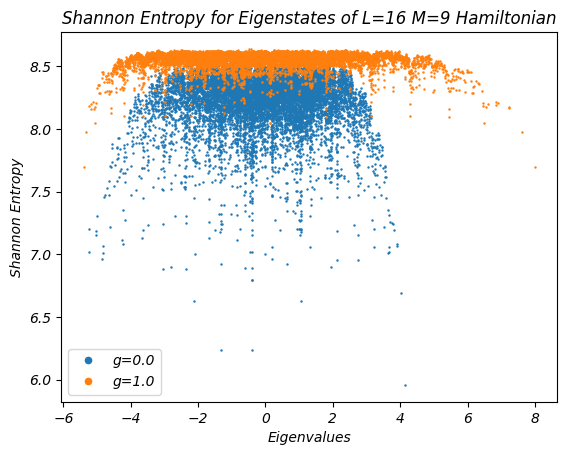

In [7]:
plt.title(f"Shannon Entropy for Eigenstates of L={l} M={m} Hamiltonian")
plt.xlabel("Eigenvalues")
plt.ylabel("Shannon Entropy")
plt.plot(int_eval.real,int_shanons, "o", markersize=0.75,label="g=0.0")

plt.plot(ch_eval.real,ch_shanons, "o", markersize=0.75,label="g=1.0")

plt.legend(markerscale=6,loc='lower left')



plt.savefig(f"shanonL{l}M{m}.pdf")

In [ ]:
np.savetxt(f"intshanL{l}M{m}.csv",np.array(int_eval),delimiter = ",")
np.savetxt(f"inteigval{l}M{m}.csv",np.array(int_shanons),delimiter = ",")


In [ ]:
np.savetxt(f"chshanL{l}M{m}.csv",np.array(ch_eval),delimiter = ",")
np.savetxt(f"cheigval{l}M{m}.csv",np.array(ch_shanons),delimiter = ",")